In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [261]:
# Regression model
#Now it is finally time to make our prediction. Linear regression will be used.

df=pd.read_csv("heroku_for_regression.csv")




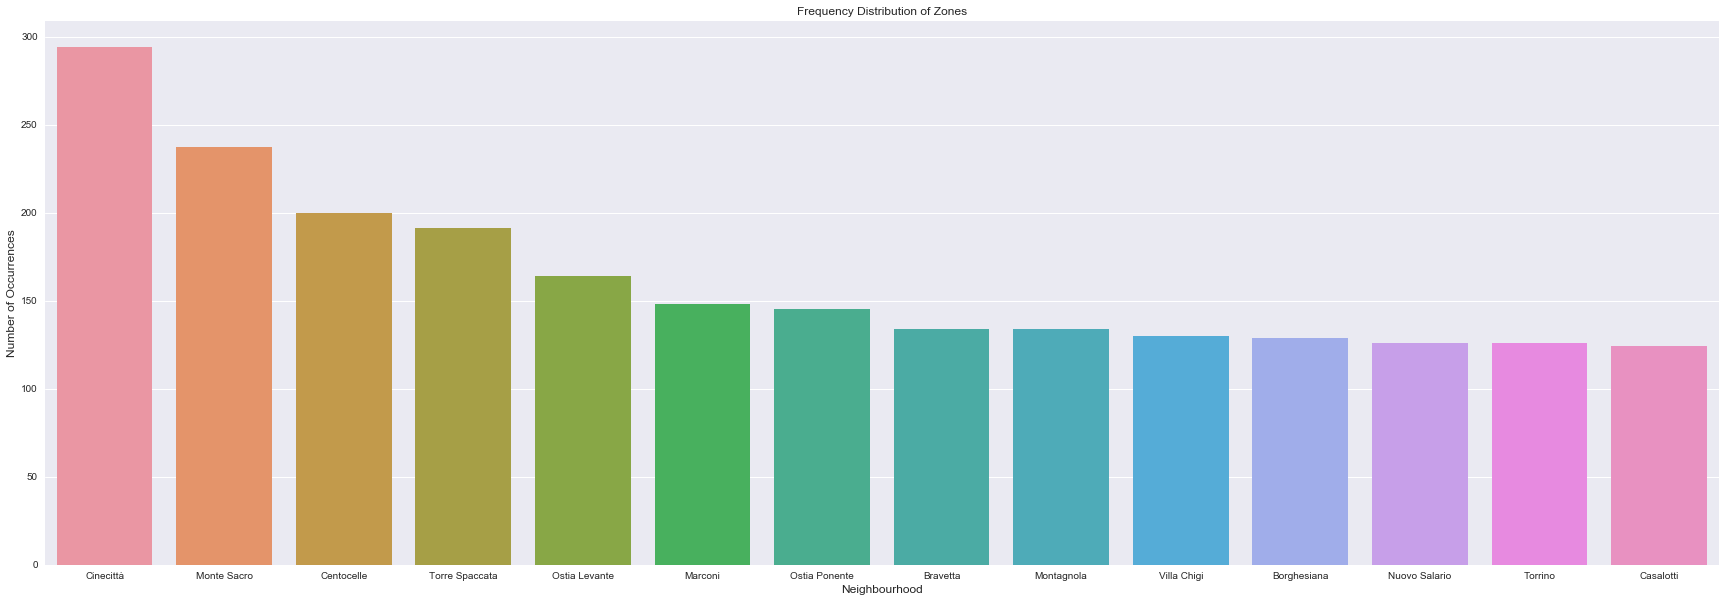

In [221]:
col = 'Zone'  # 'bar'
n = 120  
df1=df[df.groupby(col)[col].transform('count').ge(n)]
carrier_count = df1['Zone'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(30,10)) 
sns.barplot(carrier_count.index, carrier_count.values, alpha=1)
plt.title('Frequency Distribution of Zones')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)
plt.show()

In [262]:
df2 = df.copy()
lb_make = LabelEncoder()
df2['Zone'] = lb_make.fit_transform(df2['Zone'])


In [263]:
df3 = df.copy()
df3['Zonenc'] = lb_make.fit_transform(df3['Zone'])
associazione= df3[['Zone','Zonenc']] 

nomi=associazione.Zone.unique()
numero=associazione.Zonenc.unique()

In [264]:
X=df2.loc[:, df.columns != 'Price']
y=df2['Price']
#split in Test and training set
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=1/3,random_state=0)


In [248]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, Y_train)
yPrediction = linearRegressor.predict(X_test)

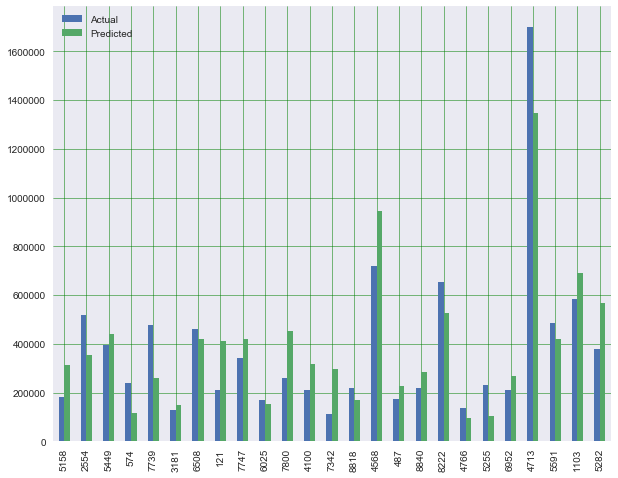

In [250]:
df3 = pd.DataFrame({'Actual': Y_test, 'Predicted': yPrediction})
df3 = df3.head(25)
df3

df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [253]:
filename = 'finalized_model.sav'
pickle.dump(linearRegressor, open(filename, 'wb'))



In [290]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
xx=np.array([2,80,1,7,160])
xx=xx.reshape(1, -1)
yPrediction = linearRegressor.predict(xx)

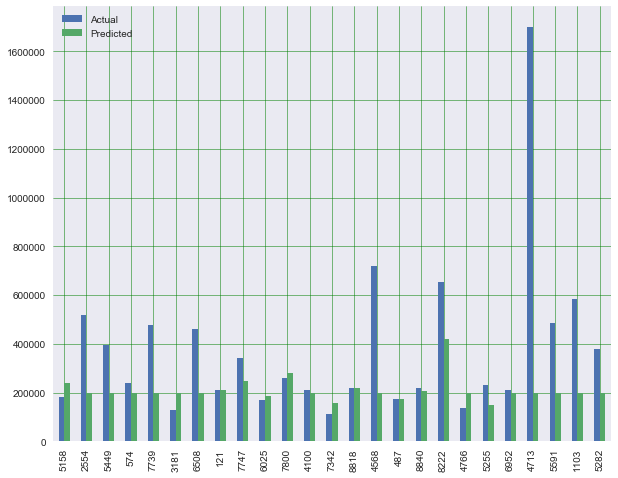

In [292]:
#Other try but very poor result--> ignore

from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(X_train, Y_train)
a=clf.predict(X_test)
df4 = pd.DataFrame({'Actual': Y_test, 'Predicted': a})
df4 = df4.head(25)

df4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()